In [ ]:
from google.colab import files
uploaded=files.upload()

Saving 311_Service_Requests_from_2010_to_Present2.csv to 311_Service_Requests_from_2010_to_Present2.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime


In [ ]:
df=pd.read_csv('311_Service_Requests_from_2010_to_Present2.csv',parse_dates=["Created Date","Closed Date"])
df.head(7)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:00,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:00,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:00,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:00,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:00,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
5,32306554,2015-12-31 23:56:00,2016-01-01 01:50:00,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
6,32306559,2015-12-31 23:55:00,2016-01-01 01:53:00,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,524 WEST 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)"


In [ ]:
df["Resquest_Closing_Time"]=df["Closed Date"]-df["Created Date"]

In [ ]:
df.shape

(684, 53)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique Key                      684 non-null    int64  
 1   Created Date                    684 non-null    object 
 2   Closed Date                     682 non-null    object 
 3   Agency                          684 non-null    object 
 4   Agency Name                     684 non-null    object 
 5   Complaint Type                  684 non-null    object 
 6   Descriptor                      673 non-null    object 
 7   Location Type                   684 non-null    object 
 8   Incident Zip                    679 non-null    float64
 9   Incident Address                614 non-null    object 
 10  Street Name                     614 non-null    object 
 11  Cross Street 1                  602 non-null    object 
 12  Cross Street 2                  601 

In [ ]:
df1=df.drop(["Bridge Highway Name","Bridge Highway Segment","Road Ramp","Bridge Highway Segment","Garage Lot Name",
 "Ferry Direction","Ferry Terminal Name","Taxi Pick Up Location","Taxi Company Borough","Vehicle Type","School or Citywide Complaint"],axis=1)

In [ ]:
df1.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Address,School City,School State,School Zip,School Not Found,Bridge Highway Direction,Latitude,Longitude,Location,Resquest_Closing_Time
0,32310363,2015-12-31 23:59:00,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:56:00
1,32309934,2015-12-31 23:59:00,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:00
2,32309159,2015-12-31 23:59:00,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:52:00
3,32305098,2015-12-31 23:57:00,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:46:00
4,32306529,2015-12-31 23:56:00,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:28:00


In [ ]:
df1.describe()

,Unique Key,Incident Zip,Landmark,X Coordinate (State Plane),Y Coordinate (State Plane),Bridge Highway Direction,Latitude,Longitude,Resquest_Closing_Time
count,6.840000e+02,679.000000,0.0,6.780000e+02,678.000000,0.0,678.000000,678.000000,682
mean,3.230783e+07,10895.275405,NaN,1.006342e+06,203211.887906,NaN,40.724395,-73.920264,0 days 03:26:42.932551319
std,1.644818e+03,532.258329,NaN,2.035742e+04,28832.301890,NaN,0.079132,0.073429,0 days 04:06:05.932480508
min,3.230507e+07,10001.000000,NaN,9.237000e+05,136611.000000,NaN,40.541547,-74.217894,0 days 00:03:00
25%,3.230648e+07,10457.000000,NaN,9.930958e+05,185182.750000,NaN,40.674713,-73.968069,0 days 01:00:15
50%,3.230774e+07,11209.000000,NaN,1.005978e+06,199905.500000,NaN,40.715368,-73.921701,0 days 02:15:00
75%,3.230919e+07,11359.000000,NaN,1.020593e+06,220262.750000,NaN,40.771220,-73.868928,0 days 04:28:45
max,3.231065e+07,11694.000000,NaN,1.065329e+06,269469.000000,NaN,40.906206,-73.707404,2 days 16:51:00


In [ ]:
df1.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
df1.columns.values

array(['Unique Key', 'Created Date', 'Closed Date', 'Agency',
       'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type',
       'Incident Zip', 'Incident Address', 'Street Name',
       'Cross Street 1', 'Cross Street 2', 'Intersection Street 1',
       'Intersection Street 2', 'Address Type', 'City', 'Landmark',
       'Facility Type', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name',
       'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City',
       'School State', 'School Zip', 'School Not Found',
       'Bridge Highway Direction', 'Latitude', 'Longitude', 'Location',
       'Resquest_Closing_Time'], dtype=object)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   Unique Key                      684 non-null    int64          
 1   Created Date                    684 non-null    datetime64[ns] 
 2   Closed Date                     682 non-null    datetime64[ns] 
 3   Agency                          684 non-null    object         
 4   Agency Name                     684 non-null    object         
 5   Complaint Type                  684 non-null    object         
 6   Descriptor                      673 non-null    object         
 7   Location Type                   684 non-null    object         
 8   Incident Zip                    679 non-null    float64        
 9   Incident Address                614 non-null    object         
 10  Street Name                     614 non-null    object        

In [ ]:
df1.loc[:,['Complaint Type','City']]

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST
...,...,...
679,Noise - Vehicle,BROOKLYN
680,Derelict Vehicle,BROOKLYN
681,Drinking,RICHMOND HILL
682,Blocked Driveway,BROOKLYN


In [ ]:
major=df1.loc[:,"Complaint Type"]
major

0      Noise - Street/Sidewalk
1             Blocked Driveway
2             Blocked Driveway
3              Illegal Parking
4              Illegal Parking
                ...           
679            Noise - Vehicle
680           Derelict Vehicle
681                   Drinking
682           Blocked Driveway
683            Illegal Parking
Name: Complaint Type, Length: 684, dtype: object

In [ ]:
major.unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public'],
      dtype=object)

In [ ]:
major.nunique()

17

In [ ]:
top=major.value_counts()
top

Blocked Driveway             242
Illegal Parking              203
Noise - Commercial            67
Noise - Street/Sidewalk       43
Derelict Vehicle              40
Vending                       25
Animal Abuse                  19
Noise - Vehicle               14
Homeless Encampment            7
Traffic                        6
Posting Advertisement          5
Drinking                       4
Noise - House of Worship       3
Noise - Park                   2
Urinating in Public            2
Bike/Roller/Skate Chronic      1
Panhandling                    1
Name: Complaint Type, dtype: int64

In [ ]:
top.head(5)

Blocked Driveway           242
Illegal Parking            203
Noise - Commercial          67
Noise - Street/Sidewalk     43
Derelict Vehicle            40
Name: Complaint Type, dtype: int64

In [ ]:
%matplotlib inline

<Axes: title={'center': 'count vs. complait types'}>

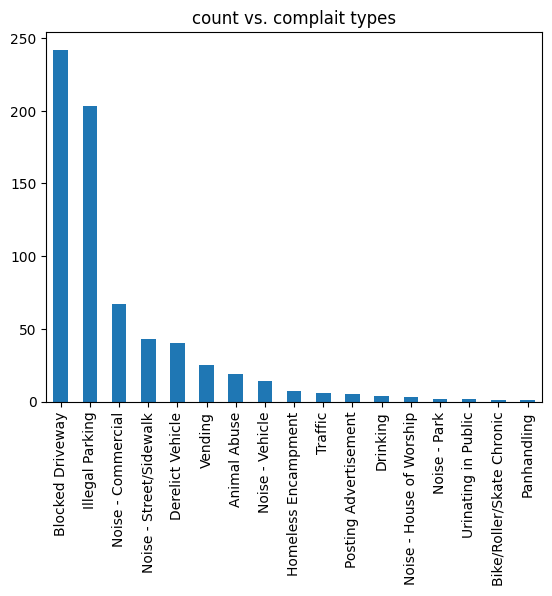

In [ ]:
major.value_counts().plot(kind='bar',title='count vs. complait types')

<Axes: title={'center': 'visualize the complaint types'}, ylabel='Frequency'>

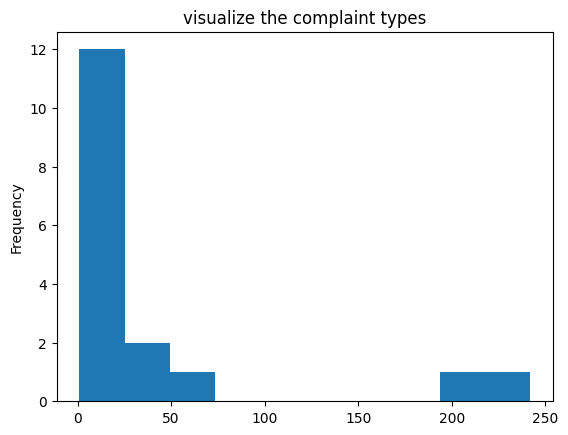

In [ ]:
top.plot(kind='hist',title='visualize the complaint types')

<Axes: title={'center': 'the major complaint types and their count'}>

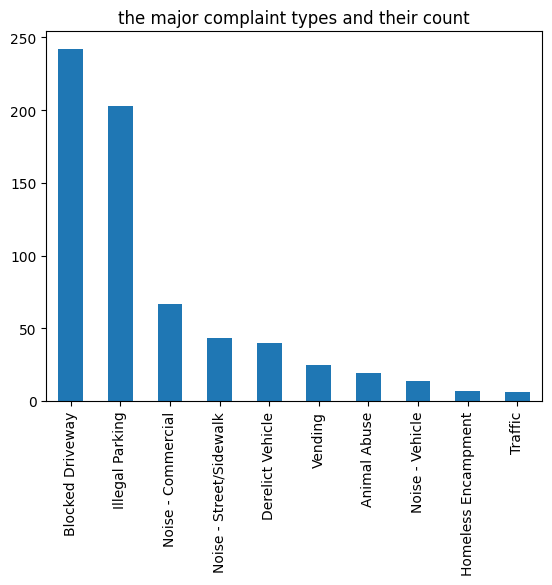

In [ ]:
top.head(10).plot(kind='bar',title='the major complaint types and their count')

In [ ]:
import statistics

Text(0, 0.5, 'count')

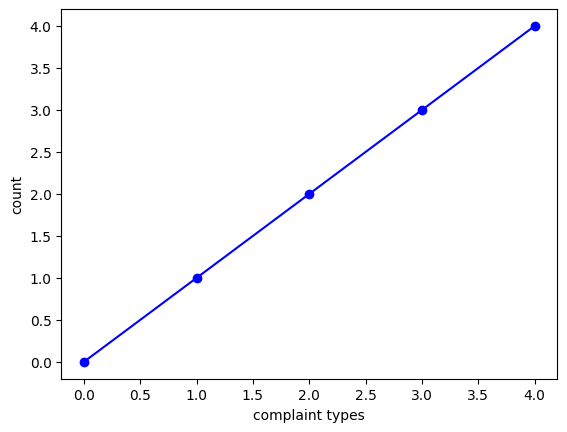

In [ ]:
major=range(5)
plt.plot(major,'-bo')
plt.xlabel('complaint types')
plt.ylabel('City')

In [ ]:
y=df1[['City','Complaint Type']]
y

,City,Complaint Type
0,NEW YORK,Noise - Street/Sidewalk
1,ASTORIA,Blocked Driveway
2,BRONX,Blocked Driveway
3,BRONX,Illegal Parking
4,ELMHURST,Illegal Parking
...,...,...
679,BROOKLYN,Noise - Vehicle
680,BROOKLYN,Derelict Vehicle
681,RICHMOND HILL,Drinking
682,BROOKLYN,Blocked Driveway
